## This notebook looks to read an image and bound the ID. The bounded ID is padded, thresholded and cleaned. 

In [12]:
from google.cloud import vision
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import rotate
from skimage.draw import polygon

from helpers.corrections import *
from helpers.image_loading import * 
from helpers.handling import *
from helpers.identity_isolation import * 

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../guppies-test-4c48569421d8.json"
client = vision.ImageAnnotatorClient()

In [13]:
random_files = ListAvaliableFiles('guppy_images', prefix='Manually_Labelled/New', verbose=False)
np.random.shuffle(random_files)

In [21]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[102])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes)

padx = 100
pady = 60
# Reduce the image to just the ID
reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

# Mask and remove for final image
masked_image = mask_and_remove(reduced_frame, verbose = True)

# Remove deltas
final_image = remove_deltas(masked_image, width=10, padx=padx, pady=pady, verbose = True)

print(output_string)

F pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: F upper height: 379 lower height: 267
T pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: T upper height: 376 lower height: 263
Y pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: Y upper height: 371 lower height: 258
7 pageno:0 blockno:0 paragraphno:0 wordno:1 symbolno:0
character: 7 upper height: 592 lower height: 420
5 pageno:0 blockno:0 paragraphno:0 wordno:1 symbolno:1
character: 5 upper height: 580 lower height: 409
2 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:0
character: 2 upper height: 727 lower height: 609
5 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:1
character: 5 upper height: 719 lower height: 602
/ pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:2
character: / upper height: 711 lower height: 596
1 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:3
character: 1 upper height: 707 lower height: 591
1 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:4
character

IndexError: list index out of range

(upper thresh, lower_thresh) = (169.76, 29.00)


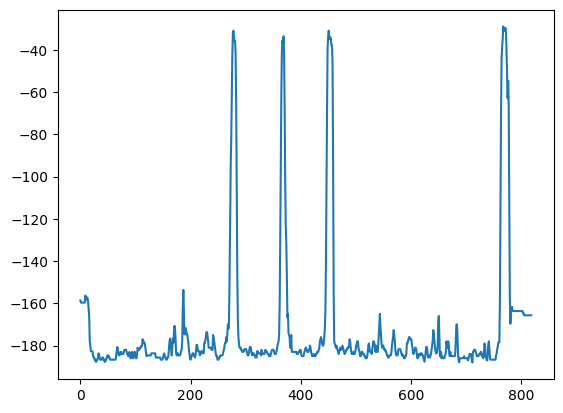

In [15]:
# Average out the RGB axis
averaged_frame = np.mean(reduced_frame,axis=2)


# White background masking
hist = np.histogram(averaged_frame, bins=100)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])

thresh_val = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
upper_thresh = centers[thresh_val] * 0.95

# Dark writing masking. Mask based on central row of frame
frame_shape = np.shape(averaged_frame)
row1 = -averaged_frame[2 * frame_shape[0] // 5][100:-100]
row2 = -averaged_frame[3 * frame_shape[0] // 5][100:-100]
rows = np.concatenate((row1, row2))
rows = row2 = -averaged_frame[1]
row_mean = np.mean(rows)
row_max = np.max(rows)
row_min = np.min(rows)
peaks,_ = scipy.signal.find_peaks(rows, height = row_mean + ((row_max - row_min) / 5), distance=4)

values = []
for peak in peaks:
    values.append(-rows[peak])

sorted_values = np.sort(values)

lower_thresh = sorted_values[0] * 1

averaged_frame[averaged_frame>upper_thresh] = 0
averaged_frame[averaged_frame<lower_thresh] = 0
averaged_frame[averaged_frame!=0] = 255

plt.plot(rows)
print('(upper thresh, lower_thresh) = (%.2f, %.2f)' %(upper_thresh, lower_thresh))

163.72716666666665

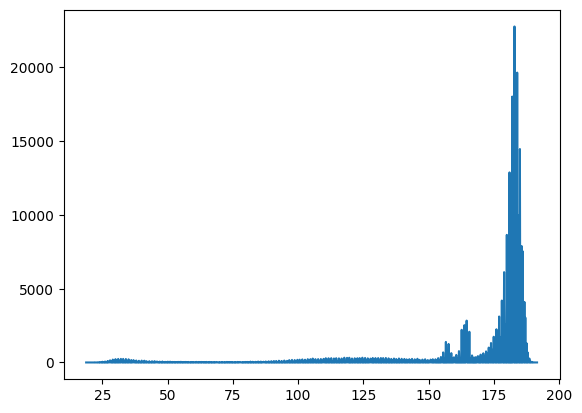

In [16]:
averaged_frame = np.mean(reduced_frame,axis=2)
hist = np.histogram(averaged_frame, bins=1000)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])
plt.plot(centers, hist[0])

thresh = np.argmax(hist[0] > np.max(hist[0]) * 0.1)
centers[thresh]

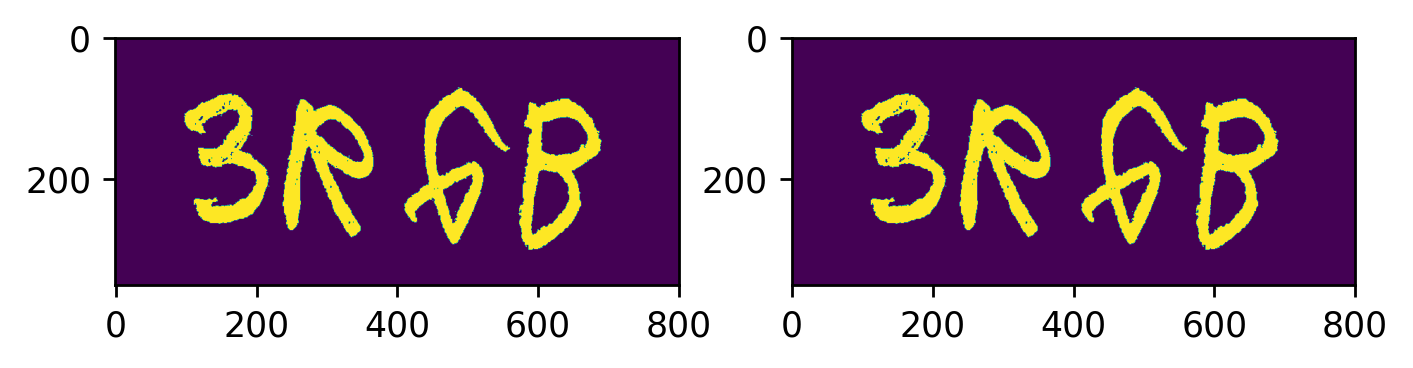

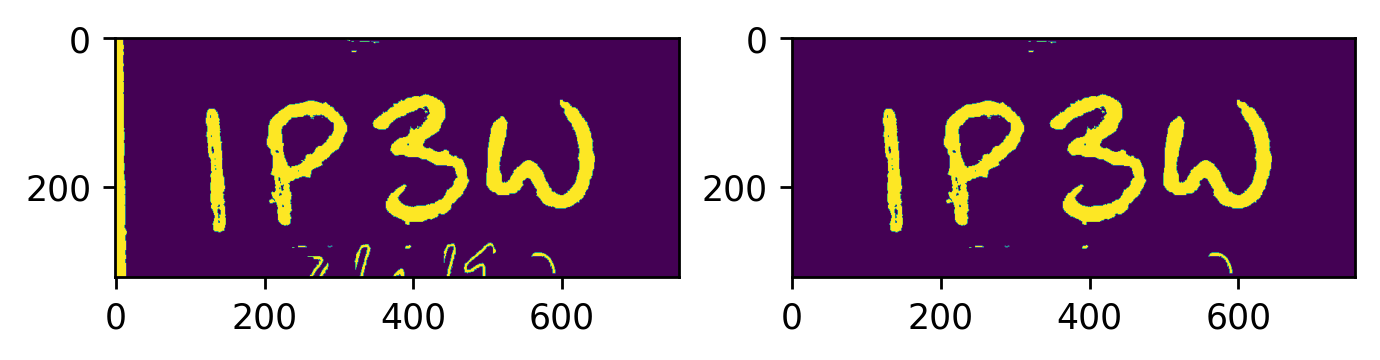

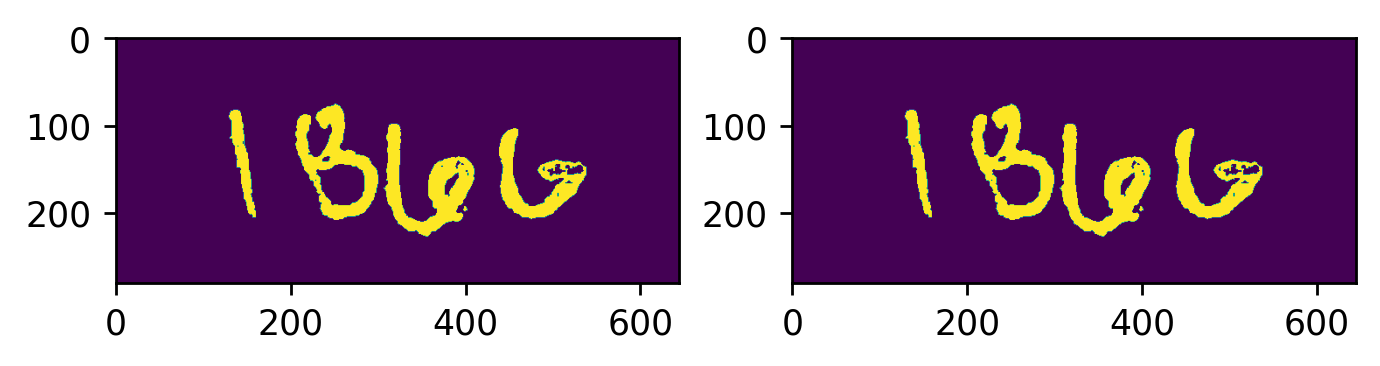

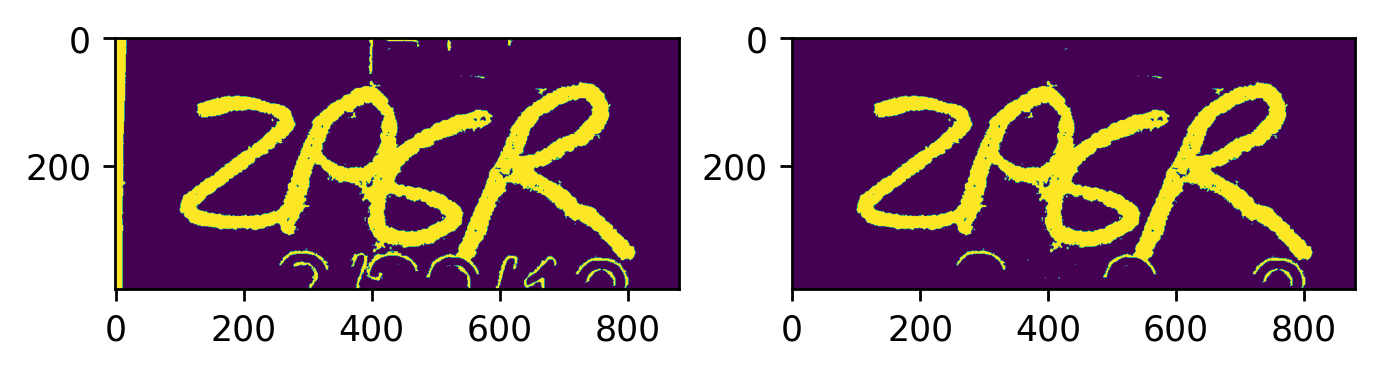

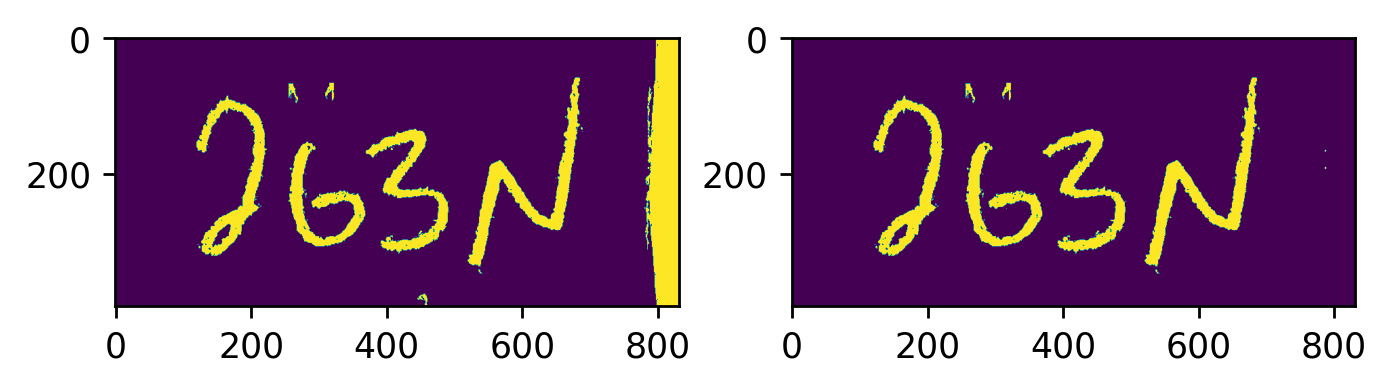

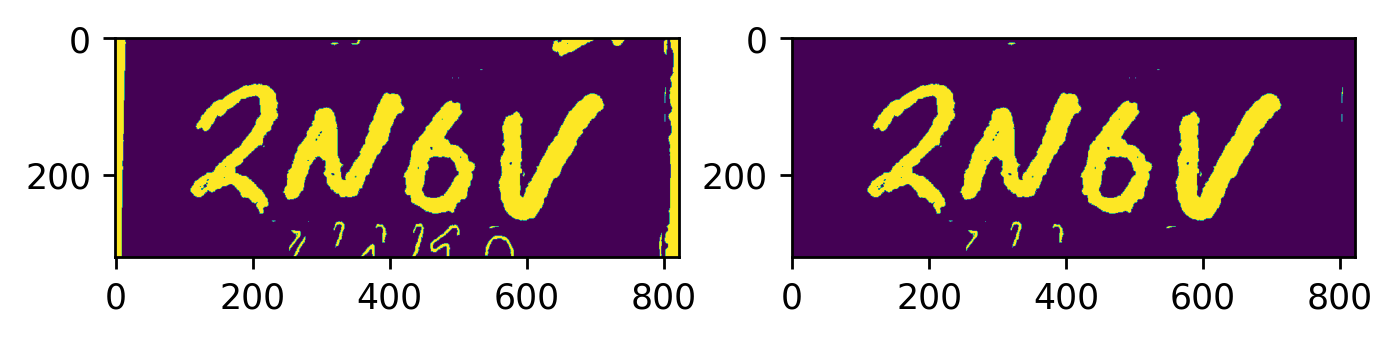

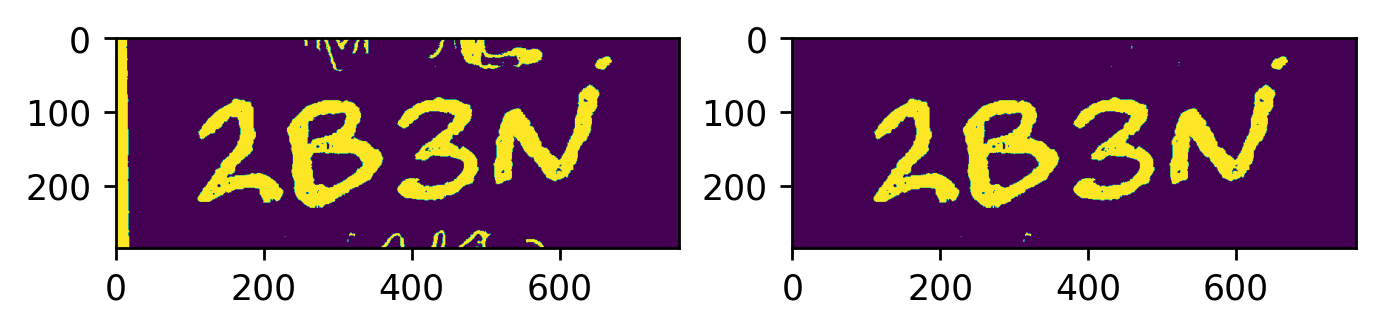

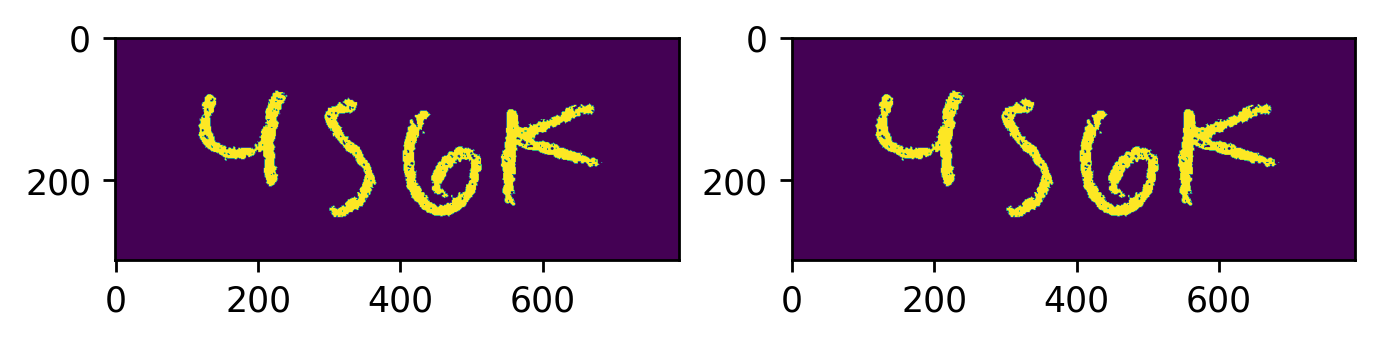

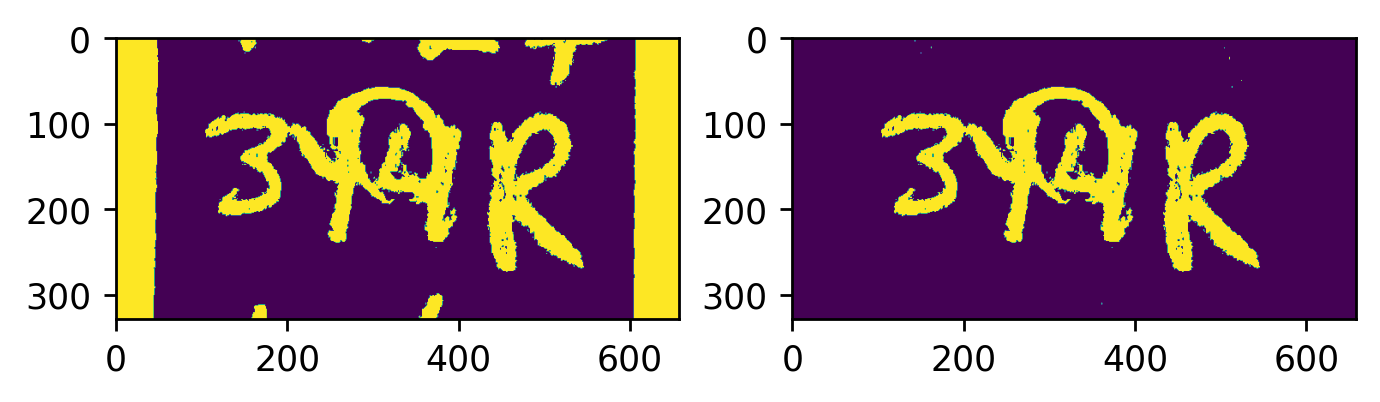

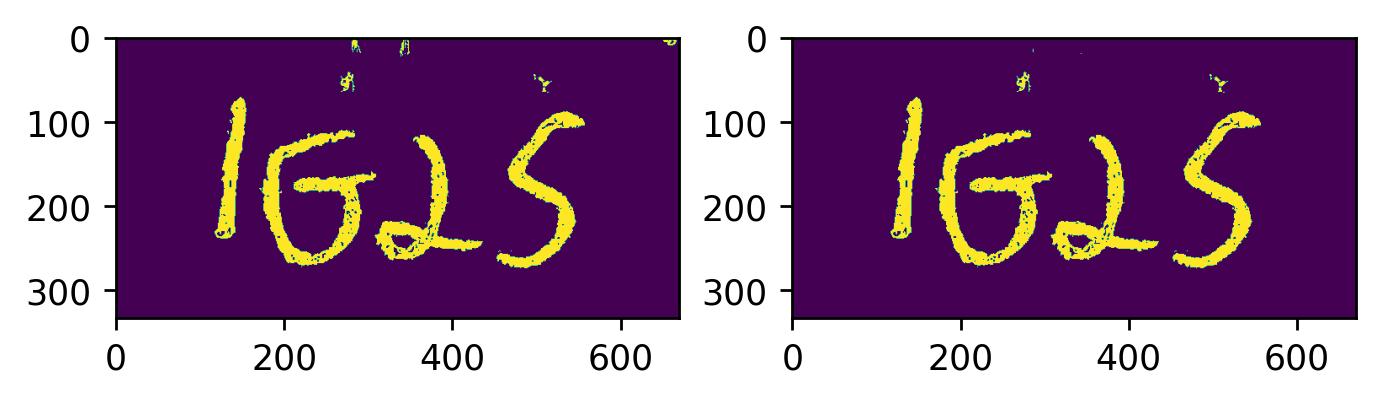

In [17]:
%matplotlib inline
padx = 100
pady = 60
for i in range(10):
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[i])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=100, pady=80)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        final_image = remove_deltas(masked_image, width=10, padx=padx, pady=pady, verbose = True)
    
    except:
        pass

In [20]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[102])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes)

F pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: F upper height: 379 lower height: 267
T pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: T upper height: 376 lower height: 263
Y pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: Y upper height: 371 lower height: 258
7 pageno:0 blockno:0 paragraphno:0 wordno:1 symbolno:0
character: 7 upper height: 592 lower height: 420
5 pageno:0 blockno:0 paragraphno:0 wordno:1 symbolno:1
character: 5 upper height: 580 lower height: 409
2 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:0
character: 2 upper height: 727 lower height: 609
5 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:1
character: 5 upper height: 719 lower height: 602
/ pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:2
character: / upper height: 711 lower height: 596
1 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:3
character: 1 upper height: 707 lower height: 591
1 pageno:0 blockno:0 paragraphno:0 wordno:2 symbolno:4
character

IndexError: list index out of range

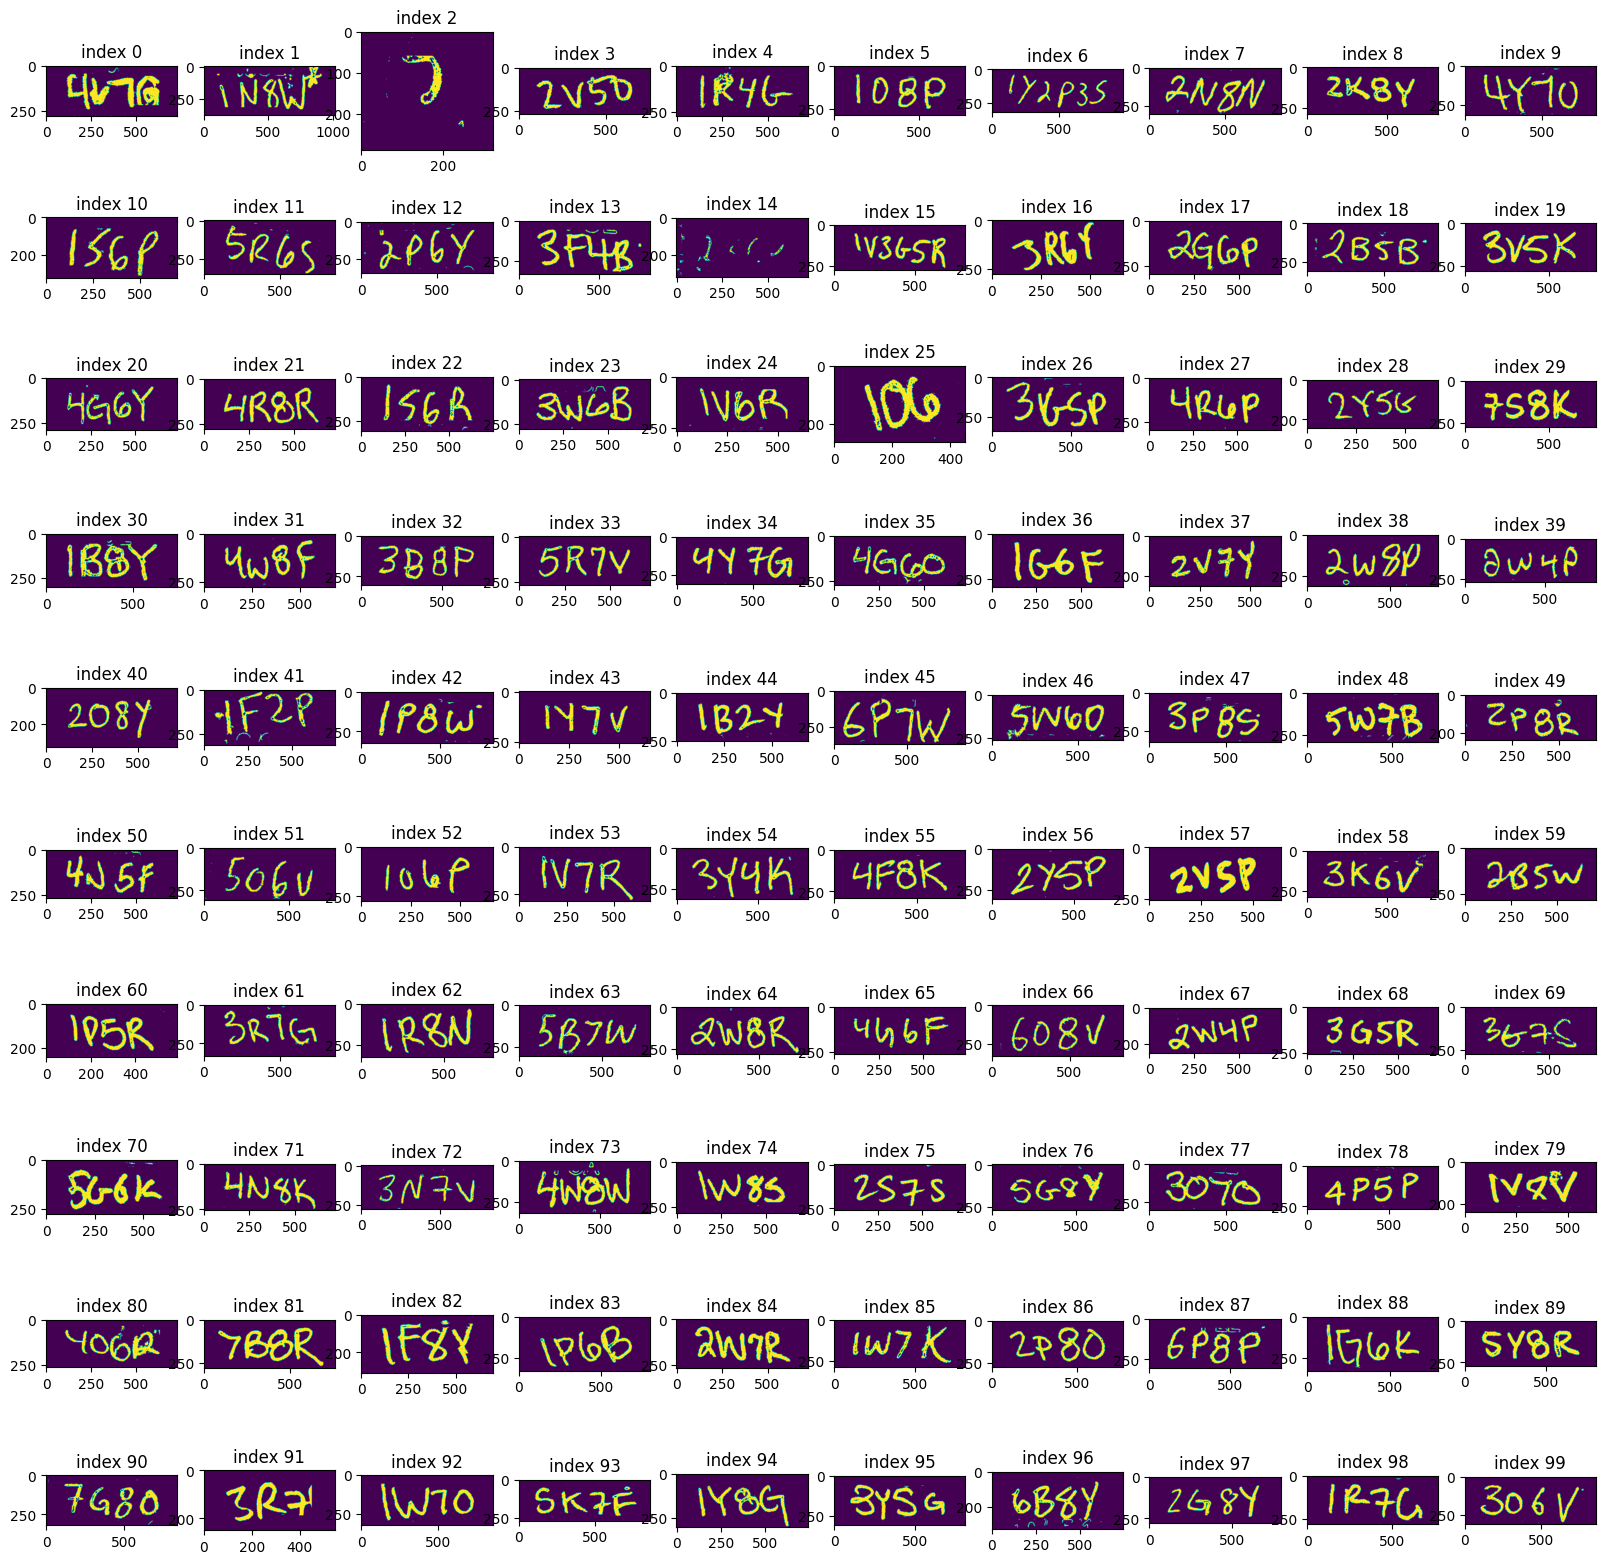

In [19]:
client = vision.ImageAnnotatorClient()
fig,ax = plt.subplots(10,10, figsize=(20,20))
padx = 100
pady = 60
for i in range(100):
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[100 + i])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        final_image = remove_deltas(masked_image, width=10, padx=padx, pady=pady, verbose = False)

        ax[i // 10, i % 10].imshow(final_image)
        ax[i // 10, i % 10].set_title('index %i' %i)

    except:
        pass